## Calibration of lab probes ANK1 ANK2

New probes made out of cables from the bookstore. I'm still calling them ANK. Probes ANK1 and ANK2 are fixed under the canyons to measure conductivity at the heads of the canyons. Electordes are NOT bent.


Channel order: CH1 - ANK1, CH2 - ANK2

I ran this calibration in situ for ANK1, ANK2 and no profiler probe.

In [1]:
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import seaborn as sns
import scipy.io as sio
import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
df = pd.read_csv('../calibration_05dec19/calibration.csv')
print(df)


    percentage  density  temperature
0            0  0.99756       20.020
1           10  1.00197       20.026
2           20  1.00615       20.016
3           30  1.01032       20.011
4           40  1.01439       20.020
5           50  1.01781       20.020
6           60  1.02244       20.020
7           70  1.02670       20.025
8           80  1.02981       20.003
9           90  1.03471       20.022
10         100  1.03875       20.008


../calibration_05dec19/000pc.mat
../calibration_05dec19/010pc.mat
../calibration_05dec19/020pc.mat
../calibration_05dec19/030pc.mat
../calibration_05dec19/040pc.mat
../calibration_05dec19/050pc.mat
../calibration_05dec19/060pc.mat
../calibration_05dec19/070pc.mat
../calibration_05dec19/080pc.mat
../calibration_05dec19/090pc.mat
../calibration_05dec19/100pc.mat


Text(0.5,1,'CH2 - ANK2 ')

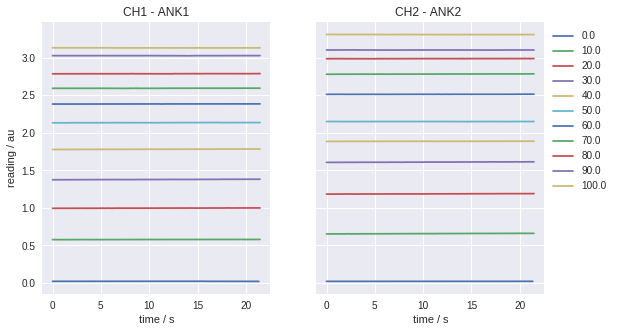

In [7]:
nums = ['000','010','020','030','040','050','060','070','080','090','100']
file_num = len(nums)

mean_read_ch1 = np.zeros(file_num)
std_read_ch1 = np.zeros(file_num)

mean_read_ch2 = np.zeros(file_num)
std_read_ch2 = np.zeros(file_num)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,5), sharey=True)

for num, ii in zip(nums, range(file_num)):
    filepath = '../calibration_05dec19/%spc.mat' %num
    print(filepath)
    mat = sio.loadmat(filepath, squeeze_me=True)
    ch1 = mat['ch1']
    ch2 = mat['ch2']
    ch3 = mat['ch3']
    time = mat['time']
    nsamples = mat['nSamples']
    
    mean_read_ch1[ii] = np.mean(ch1)
    std_read_ch1[ii] = np.std(ch1)
    
    mean_read_ch2[ii] = np.mean(ch2)
    std_read_ch2[ii] = np.std(ch2)
    
    ax0.plot(time,ch1)
    ax1.plot(time,ch2, label='%1.1f' %df.percentage[ii])
    
ax1.legend(bbox_to_anchor=(1,1))
ax0.set_ylabel('reading / au')
ax0.set_xlabel('time / s')
ax1.set_xlabel('time / s')
ax0.set_title('CH1 - ANK1')
ax1.set_title('CH2 - ANK2 ')

ANK1
rho_1 = 0.997088+0.010496r+-0.002390r^2+0.001029r^3 

ANK2
rho_2 = 0.997253+0.007495r+-0.000470r^2+0.000595r^3 



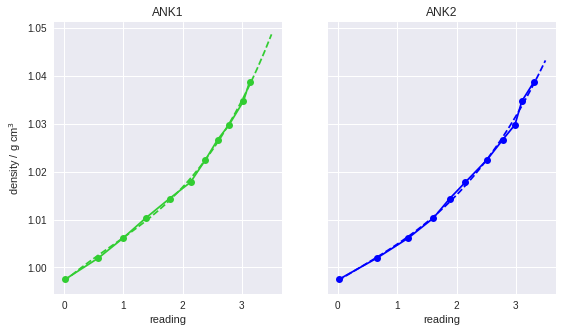

In [10]:
coef1, stats1 = P.polyfit(mean_read_ch1[:],np.array(df.density)[:],3,full=True)
coef2, stats2 = P.polyfit(mean_read_ch2[:],np.array(df.density)[:],3,full=True)

read_dummy = np.linspace(0,3.5,30)

fit1 = coef1[0]+(coef1[1]*read_dummy)+(coef1[2]*read_dummy**2) + (coef1[3]*read_dummy**3)
fit2 = coef2[0]+(coef2[1]*read_dummy)+(coef2[2]*read_dummy**2) + (coef2[3]*read_dummy**3)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,5), sharey=True)

ax0.errorbar(mean_read_ch1,df.density, xerr=std_read_ch1, marker='o', color='limegreen')
ax0.plot(read_dummy, fit1, '--',color='limegreen')

ax1.errorbar(mean_read_ch2,df.density, xerr=std_read_ch2, marker='o', color='blue')
ax1.plot(read_dummy, fit2, '--',color='blue')

ax0.set_xlabel('reading')
ax0.set_ylabel('density / g cm$^3$')
ax1.set_xlabel('reading')
ax0.set_title('ANK1')
ax1.set_title('ANK2')

print('ANK1')
print('rho_1 = %f+%fr+%fr^2+%fr^3 \n' %(coef1[0], coef1[1], coef1[2], coef1[3]))

print('ANK2')
print('rho_2 = %f+%fr+%fr^2+%fr^3 \n' %(coef2[0], coef2[1], coef2[2], coef2[3]))